In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
y,sr = librosa.load("/content/best_recording.wav")

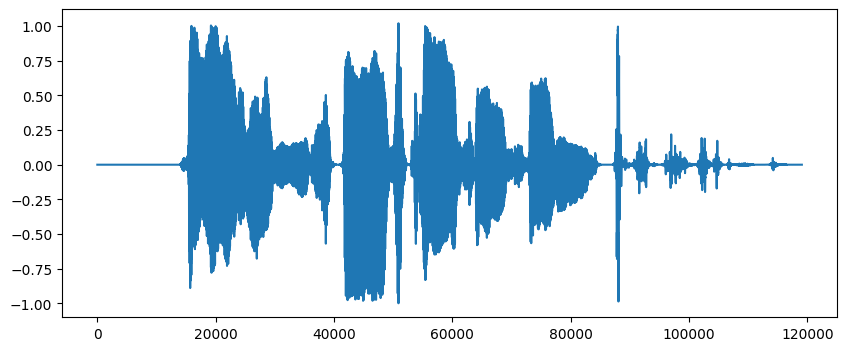

In [3]:
plt.figure(figsize=(10,4))
plt.plot(y)

In [4]:
fft_ = np.fft.fft(y)
print(fft_)

[ 3.54789065 +0.j         -2.5738638 +13.04759626j
 -9.6619052  +0.20210957j ...  5.91954159 +9.13233172j
 -9.6619052  -0.20210957j -2.5738638 -13.04759626j]


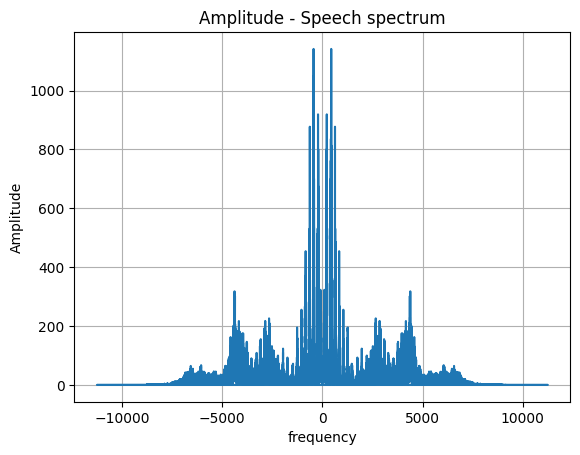

In [25]:
ffts = np.fft.fft(y)
amplitudes = np.abs(ffts)
frequencies = np.fft.fftfreq(len(y), d=1.0 / sr)
plt.plot(frequencies, amplitudes)
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.title("Amplitude - Speech spectrum")
plt.grid(True)
plt.show()

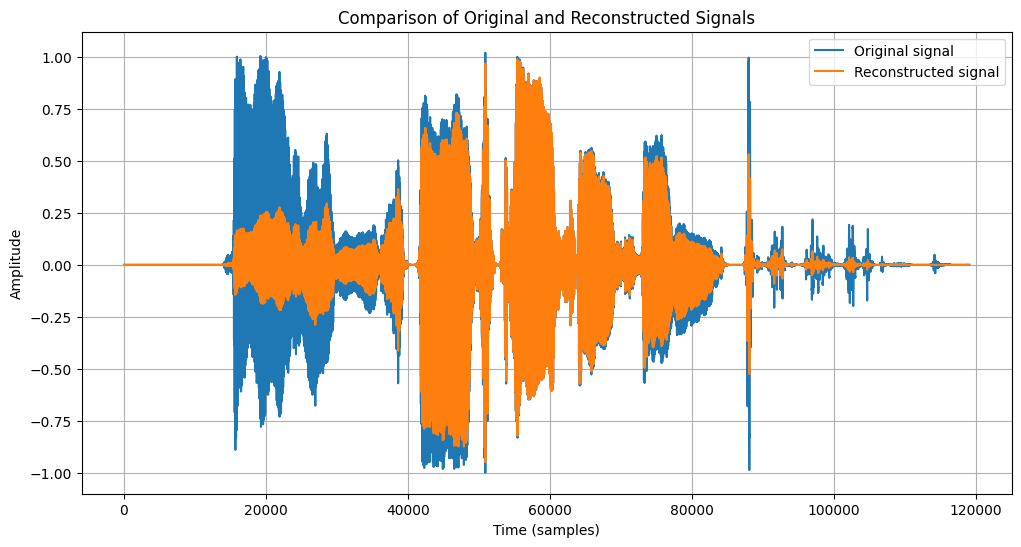

Mean squared error: 0.004582764836140204
Peak error: 0.8343618048669967


In [26]:
import matplotlib.pyplot as plt
import librosa

speech_signal, sample_rate = librosa.load(r"/content/best_recording.wav")
window = np.hanning(len(speech_signal))
speech_signal_windowed = speech_signal * window
fft_result = np.fft.fft(speech_signal_windowed)
inversed_signal = np.fft.ifft(fft_result)

plt.figure(figsize=(12, 6))
plt.plot(speech_signal[:len(inversed_signal)], label='Original signal')
plt.plot(np.real(inversed_signal), label='Reconstructed signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Comparison of Original and Reconstructed Signals')
plt.legend()
plt.grid(True)
plt.show()
error = np.abs(speech_signal[:len(inversed_signal)] - np.real(inversed_signal))
print(f"Mean squared error: {np.mean(error**2)}")
print(f"Peak error: {np.max(error)}")

In [7]:
from IPython.display import Audio

In [8]:
Audio("/content/best_recording.wav")

In [9]:
len(y)

119070

In [10]:
Audio(y[14000:22000],rate = sr)

In [11]:
word = y[14000:22000]

In [12]:
word_fft = np.fft.fft(word)

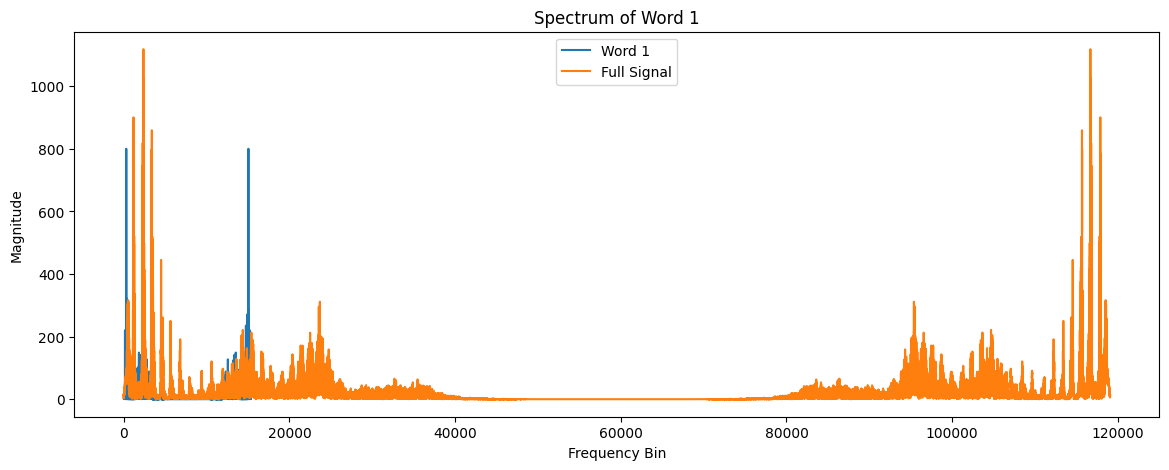

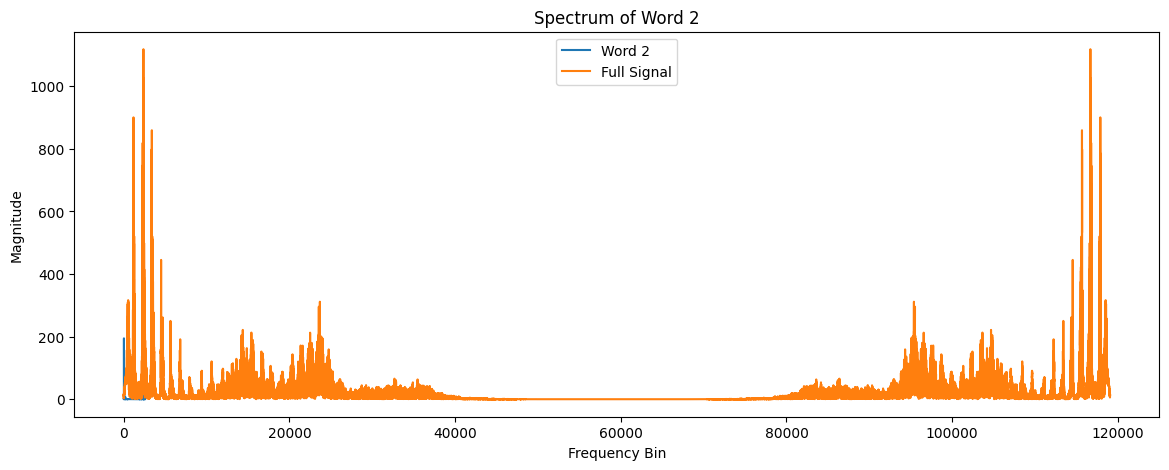

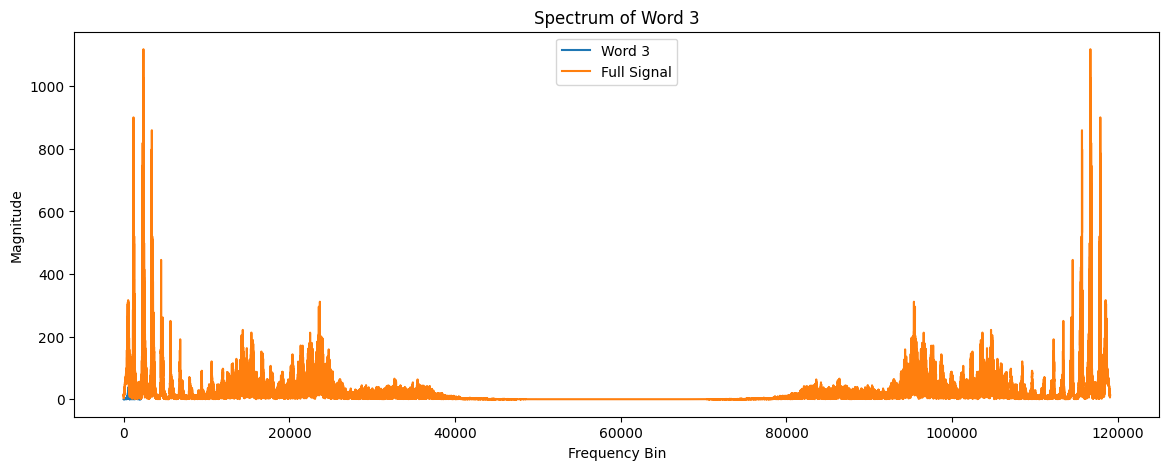

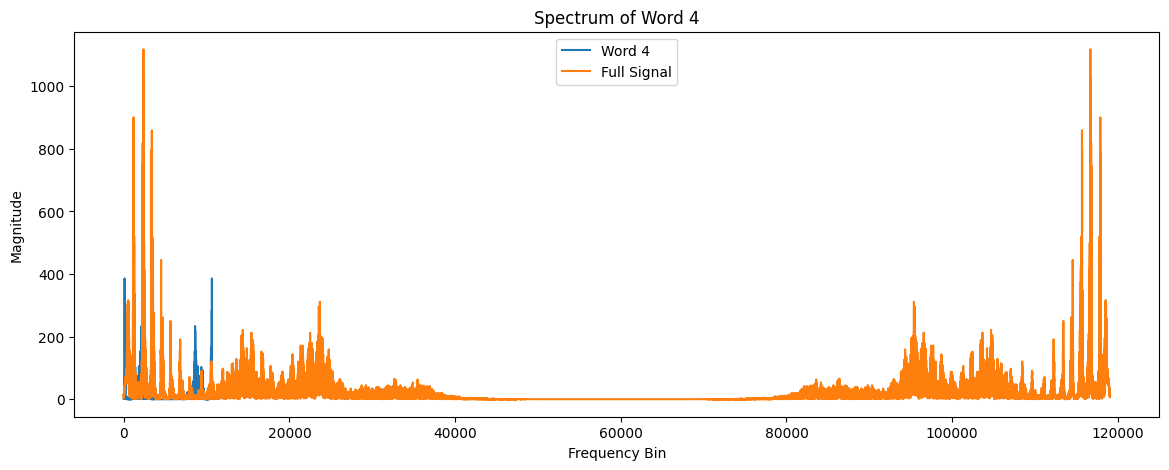

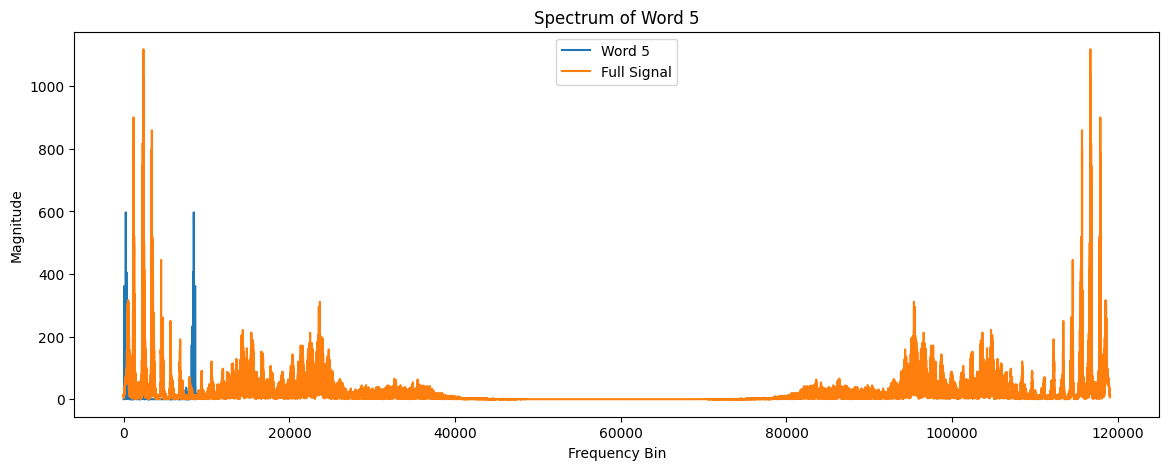

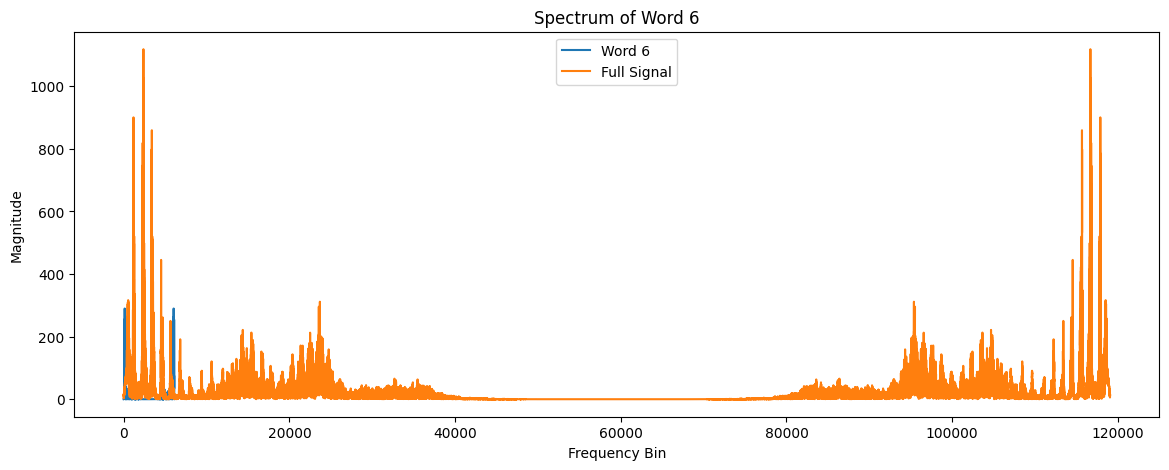

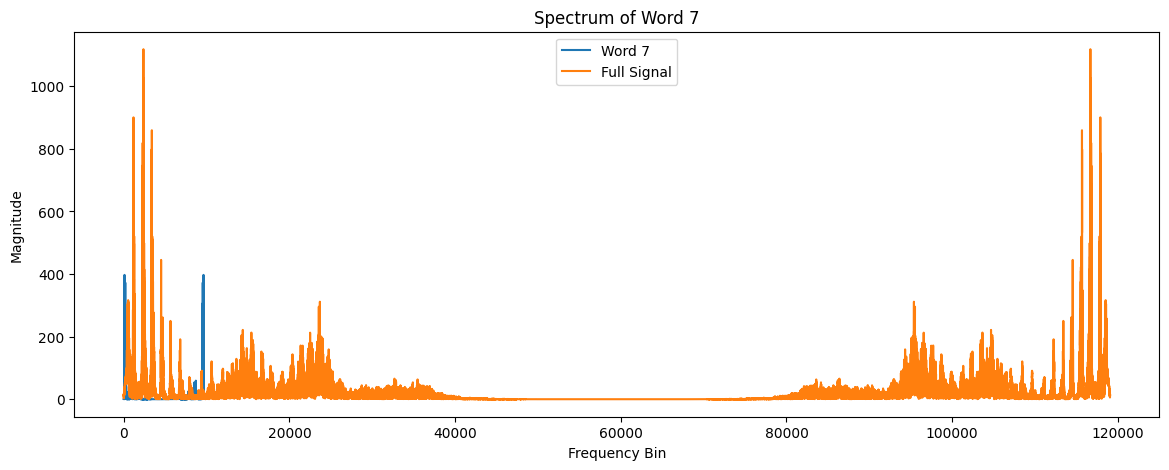

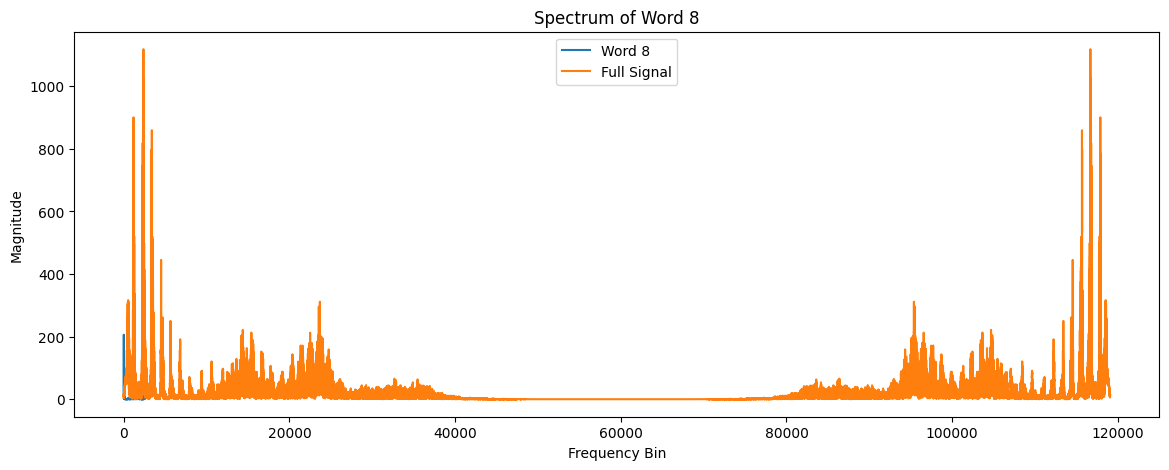

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

audio_file = r"/content/best_recording.wav"
speech_signal, sample_rate = librosa.load(audio_file)

threshold = np.percentile(np.abs(speech_signal), 92)
segments = librosa.effects.split(speech_signal, top_db=-20 * np.log10(threshold))
for i, (start, end) in enumerate(segments):
    word = speech_signal[start:end]
    D_full = np.fft.fft(speech_signal)
    D_word = np.fft.fft(word)
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D_word), label=f'Word {i+1}')
    plt.plot(np.abs(D_full), label='Full Signal')

    plt.title(f'Spectrum of Word {i+1}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

In [14]:
y_22500,r = librosa.load("/content/best_recording.wav",sr = 22500)
Audio(y_22500,rate = r)

In [15]:
fft_2 = np.fft.fft(y_22500[10000:10450])

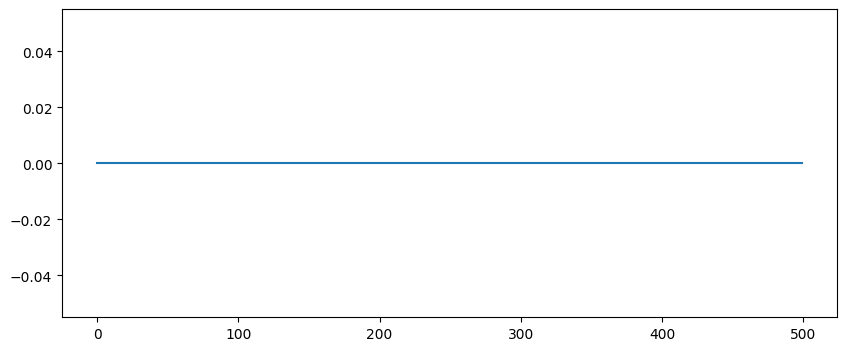

In [24]:
from IPython.display import Audio
Audio(r"/content/best_recording.wav")
y,sr = librosa.load(r"/content/best_recording.wav",sr = 22500)
Audio(y,rate = sr)

# 1s = 22500
# 20ms
# x = 500 ( window size )

fft_2 = np.fft.fft(y[10000:10500])
plt.figure(figsize=(10,4))
plt.plot(abs(fft_2))

In [18]:
y = librosa.stft(y_22500,n_fft=450,hop_length=225)
print(y)

[[ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ... -1.4356888e-03+0.0000000e+00j
   2.6864156e-03+0.0000000e+00j  3.4584253e-04+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  1.5149943e-03+3.6910878e-04j
  -1.5858827e-03-3.5948999e-04j  3.6840115e-04-6.3801446e-04j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ... -6.8920135e-04+3.3029288e-04j
  -3.7487253e-04+1.4529802e-03j -9.8243437e-04-5.3350206e-05j]
 ...
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  2.0210206e-07+2.1090123e-08j
   2.0094417e-07+2.7451069e-08j  5.1499657e-05+1.2171897e-06j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  4.2059405e-08+7.2895991e-09j
   8.3080025e-08+3.3054167e-08j -5.1121962e-05-6.2575799e-07j]
 [ 0.0000000e+00+0.0000000e+00j  0.00000

In [19]:
from scipy.signal import spectrogram

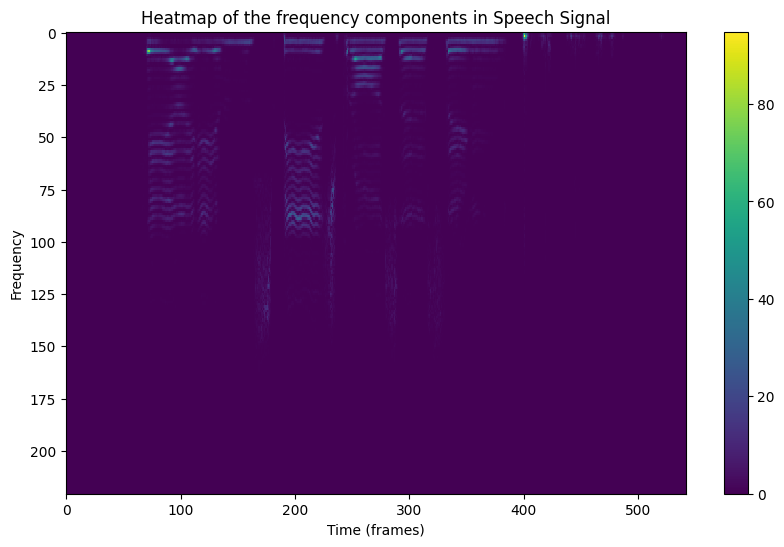

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

speech_signal, sample_rate = librosa.load(r"/content/best_recording.wav")
window_size = 0.02   # 20mSec
window_length = int(window_size * sample_rate)
hop_size = window_length // 2
stft_matrix = librosa.stft(speech_signal, n_fft=window_length, hop_length=hop_size)
stft_mag = np.abs(stft_matrix)
plt.figure(figsize=(10, 6))
plt.imshow(stft_mag, aspect='auto', interpolation='nearest')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency')
plt.title('Heatmap of the frequency components in Speech Signal')
plt.colorbar()
plt.show()